<a href="https://colab.research.google.com/github/cmason30/datascience-funhouse/blob/master/pytorch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Real-world dta with Tensors

 - Tensors are the floundation for data input and output of neural networks
 - All operations within a neural network and during optimization are operations between tensors
  - Also, Parameters in a neural network are tensors (like weights and biases)

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving bobby.jpg to bobby.jpg


In [ ]:
import imageio

img_arr = imageio.imread('bobby.jpg')
img_arr

In [ ]:
img = torch.from_numpy(img_arr)
out = img.permute(2,0,1)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [9]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype = torch.uint8)

# Batch will consist of 3 RGB images 256x256 in size. Each color will be represented
# by an 8 bit integer, as in most photographic formats from standard
# consumers cameras

In [10]:
cats = ['cat1.png', 'cat2.png', 'cat3.png']

for i, filename in enumerate(cats):
  img_arr = imageio.imread(filename)
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2,0,1)
  img_t = img_t[:3]
  batch[i] = img_t

Normalizing the images to prep for neural network

 - Best practice is to try and get your data normalized to a 0 to 1 range or a -1 to 1 range. 

In [11]:
batch = batch.float()
batch /= 255.0

In [ ]:
n_channels = batch.shape[1]
for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  batch[:, c] = (batch[:, c] - mean) / std
  print(batch[:, c])

3-D image processing

In [20]:
dir_path = '/content/sample_data/2-LUNG 3.0  B70f-04083'

vol_arr = imageio.volread(dir_path, "DICOM")
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 40/99  (40.4%)99/99  (100.0%)


(99, 512, 512)

In [23]:
# Make room for channel dimension using squeeze

vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

Tabular Data Processing

In [24]:
import csv

wineq_numpy = np.loadtxt(r'/content/sample_data/winequality-white.csv', dtype=np.float32,
                         delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [25]:
col_list = next(csv.reader(open(r'/content/sample_data/winequality-white.csv'), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

In [36]:
data = wineq[:, :-1]

# Remove score column, but keep it for later to use as ground truth

In [30]:
target = wineq[:, -1]

In [32]:
target = wineq[:, -1].long()

In [33]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)



tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [34]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

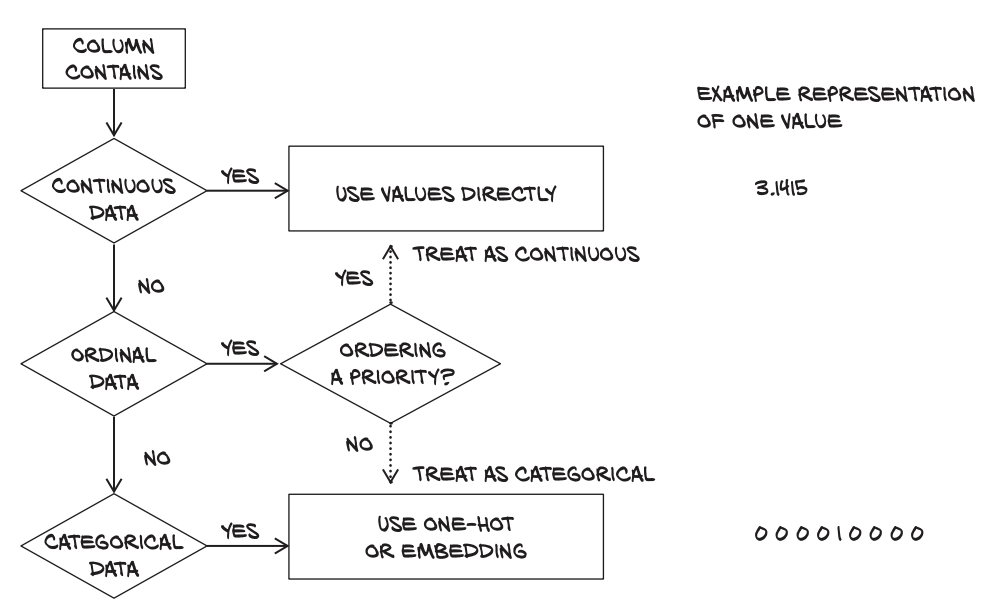

In [ ]:
# How to treat columns with continuous, ordinal, and categorical data (seen above)

In [37]:
# Grab some summary statistics from our tensors

data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [39]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [40]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7209e-01, -8.1764e-02,  ..., -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3467e-03, -8.2418e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [41]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [42]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [45]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
  print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

  

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [46]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [47]:
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [48]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)